<a href="https://colab.research.google.com/github/Gopichandkollu/Python-with-ML/blob/main/Day_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cars=pd.read_csv(r"/content/Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isna().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [7]:
cars.shape

(81, 5)

In [8]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [9]:
cars.isna().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [10]:
from seaborn import scatterplot

In [11]:
import warnings
warnings.filterwarnings("ignore")

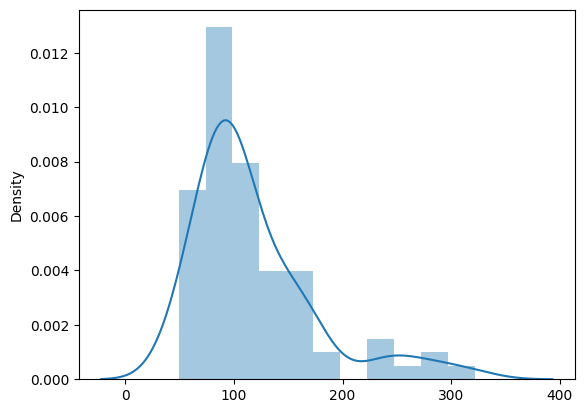

In [12]:
sns.distplot(x=cars['HP'])
plt.show()

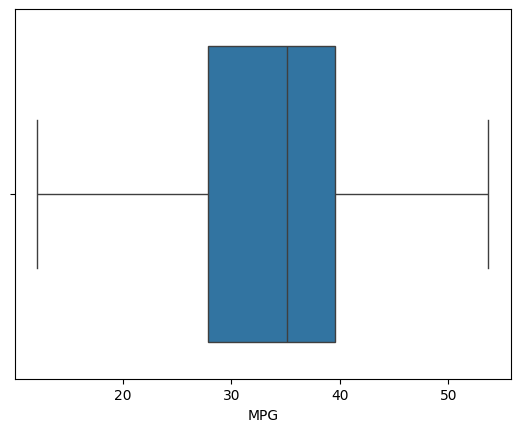

In [13]:
sns.boxplot(x=cars['MPG'])
plt.show()

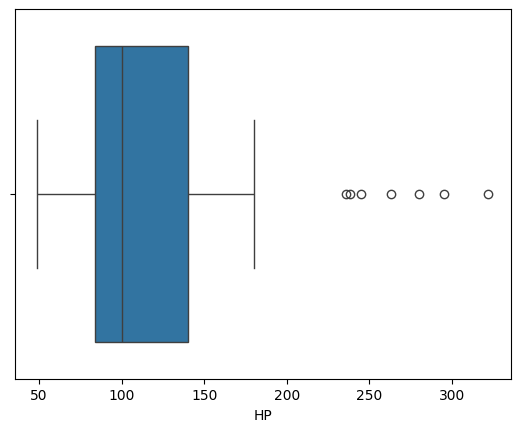

In [14]:
sns.boxplot(x=cars['HP'])
plt.show()

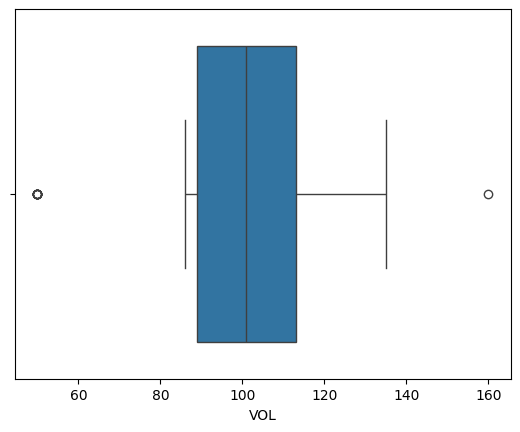

In [15]:
sns.boxplot(x=cars['VOL'])
plt.show()

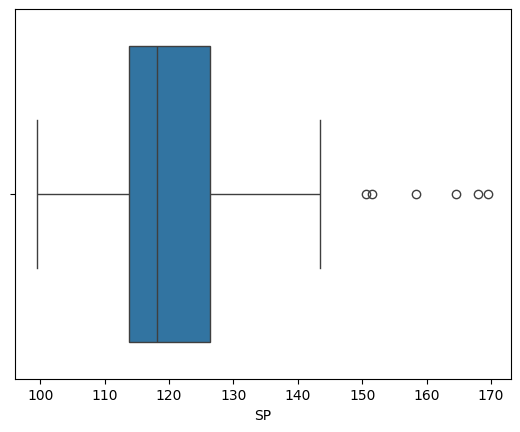

In [16]:
sns.boxplot(x=cars['SP'])
plt.show()

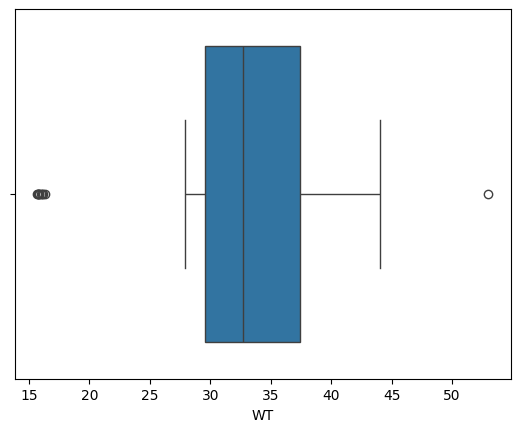

In [17]:
sns.boxplot(x=cars['WT'])
plt.show()

<Axes: xlabel='VOL', ylabel='MPG'>

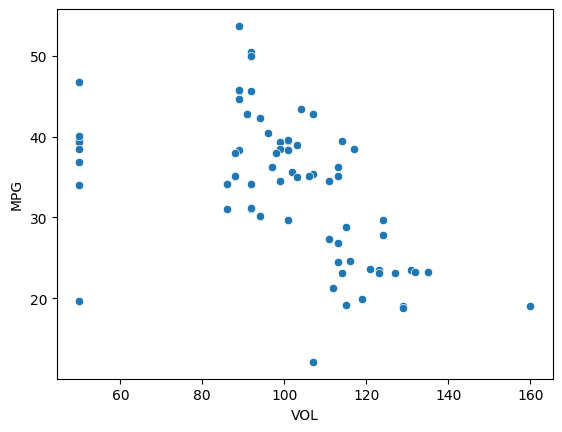

In [18]:
scatterplot(x=cars['VOL'],y=cars['MPG'])

<Axes: xlabel='MPG', ylabel='VOL'>

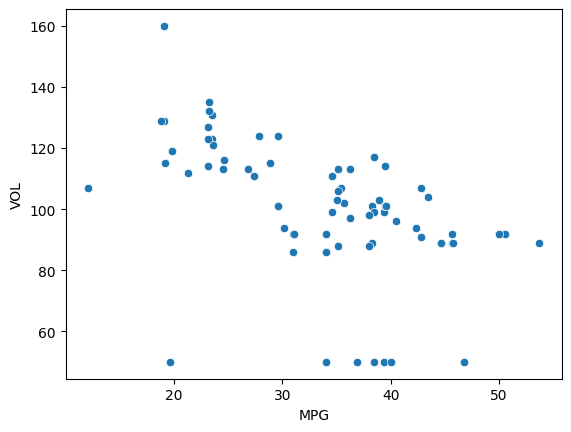

In [19]:
scatterplot(x=cars['MPG'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='WT'>

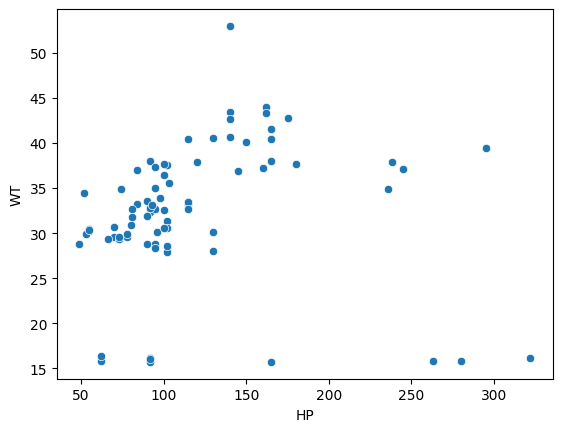

In [20]:
scatterplot(x=cars['HP'],y=cars['WT'])

<Axes: xlabel='HP', ylabel='SP'>

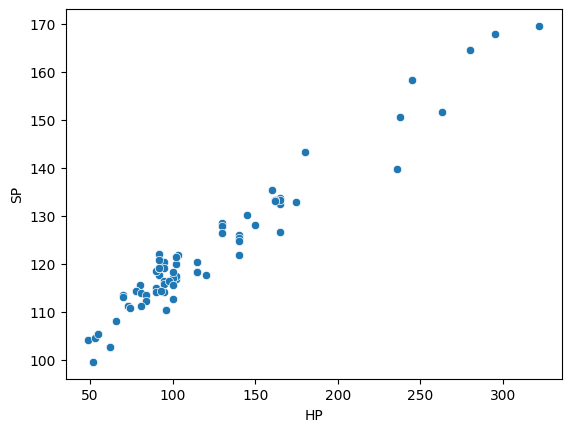

In [21]:
scatterplot(x=cars['HP'],y=cars['SP'])

<Axes: xlabel='HP', ylabel='VOL'>

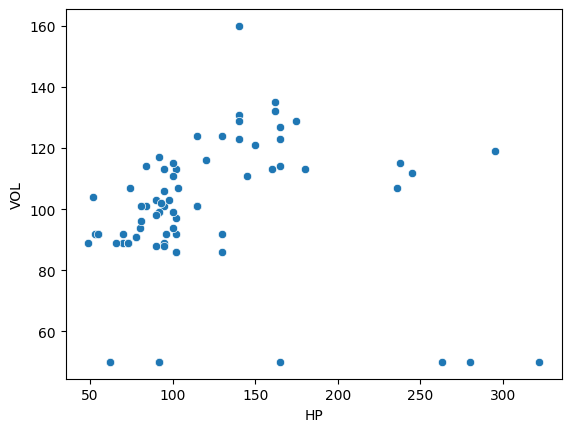

In [22]:
scatterplot(x=cars['HP'],y=cars['VOL'])

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','VOL','SP','WT']]=sc.fit_transform(cars[['HP','VOL','SP','WT']])

In [25]:
np.round(cars.describe(),2)

,HP,MPG,VOL,SP,WT
count,81.00,81.00,81.00,81.00,81.00
mean,-0.00,34.42,0.00,0.00,0.00
std,1.01,9.13,1.01,1.01,1.01
min,-1.21,12.10,-2.20,-1.56,-2.24
25%,-0.59,27.86,-0.44,-0.55,-0.38
50%,-0.31,35.15,0.10,-0.24,0.04
75%,0.40,39.53,0.64,0.35,0.67
max,3.60,53.70,2.76,3.41,2.76


In [29]:
import statsmodels.formula.api as smf
ml_v=smf.ols('MPG~VOL',data=cars).fit()
ml_v.rsquared

0.2799008651122705

In [30]:
ml_v.params

,0
Intercept,34.422076
VOL,-4.801137


In [31]:
ml_v=smf.ols('MPG~WT',data=cars).fit()
np.round(ml_v.rsquared,2)

0.28

In [32]:
ml_v.params

,0
Intercept,34.422076
WT,-4.780288


In [33]:
ml_v=smf.ols('MPG~SP',data=cars).fit()
np.round(ml_v.rsquared,2)

0.47

In [34]:
ml_v.params

,0
Intercept,34.422076
SP,-6.235589
